In [ ]:
! pip install kaggle
! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d aneesh10/cricket-shot-dataset

100% 644M/645M [00:16<00:00, 43.9MB/s]
100% 645M/645M [00:16<00:00, 41.2MB/s]


In [ ]:
!unzip cricket-shot-dataset.zip

Archive:  cricket-shot-dataset.zip
  inflating: data/drive/drives1.png  
  inflating: data/drive/drives10.png  
  inflating: data/drive/drives100.png  
  inflating: data/drive/drives1000.png  
  inflating: data/drive/drives1001.png  
  inflating: data/drive/drives1002.jpeg  
  inflating: data/drive/drives1003.png  
  inflating: data/drive/drives1004.png  
  inflating: data/drive/drives1005.png  
  inflating: data/drive/drives1006.png  
  inflating: data/drive/drives1007.png  
  inflating: data/drive/drives1008.jpeg  
  inflating: data/drive/drives1009.png  
  inflating: data/drive/drives101.png  
  inflating: data/drive/drives1010.png  
  inflating: data/drive/drives1011.png  
  inflating: data/drive/drives1012.png  
  inflating: data/drive/drives1013.png  
  inflating: data/drive/drives1014.jpeg  
  inflating: data/drive/drives1015.png  
  inflating: data/drive/drives1016.png  
  inflating: data/drive/drives1017.png  
  inflating: data/drive/drives1018.png  
  inflating: data/drive/dr

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Ignore the warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [ ]:
os.listdir("/content/data")

['legglance-flick', 'pullshot', 'sweep', 'drive']

In [ ]:
pullshot="/content/data/pullshot"
sweep="/content/data/sweep"
drive="/content/data/drive"
legglance="/content/data/legglance-flick"

# Joining datasets for making it trainable

In [ ]:
import cv2
from tqdm import tqdm

In [ ]:
X=[]
Z=[]

In [ ]:
len(X)

0

In [ ]:
def assign_label(img, short_type):
    return short_type

In [ ]:
def add_shorts_to_train_data(short_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,short_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150,150))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
add_shorts_to_train_data("pullshot",pullshot)
len(X)

100%|██████████| 1260/1260 [00:04<00:00, 300.53it/s]


1260

In [ ]:
add_shorts_to_train_data("sweep",sweep)
len(X)

100%|██████████| 1120/1120 [00:05<00:00, 222.12it/s]


2380

In [ ]:
add_shorts_to_train_data("drive",drive)
len(X)

100%|██████████| 1224/1224 [00:08<00:00, 147.32it/s]


3604

In [ ]:
add_shorts_to_train_data("legglance-flick",legglance)
len(X)

100%|██████████| 1120/1120 [00:18<00:00, 59.38it/s]


4724

# Visualizing Entire Shorts-Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm

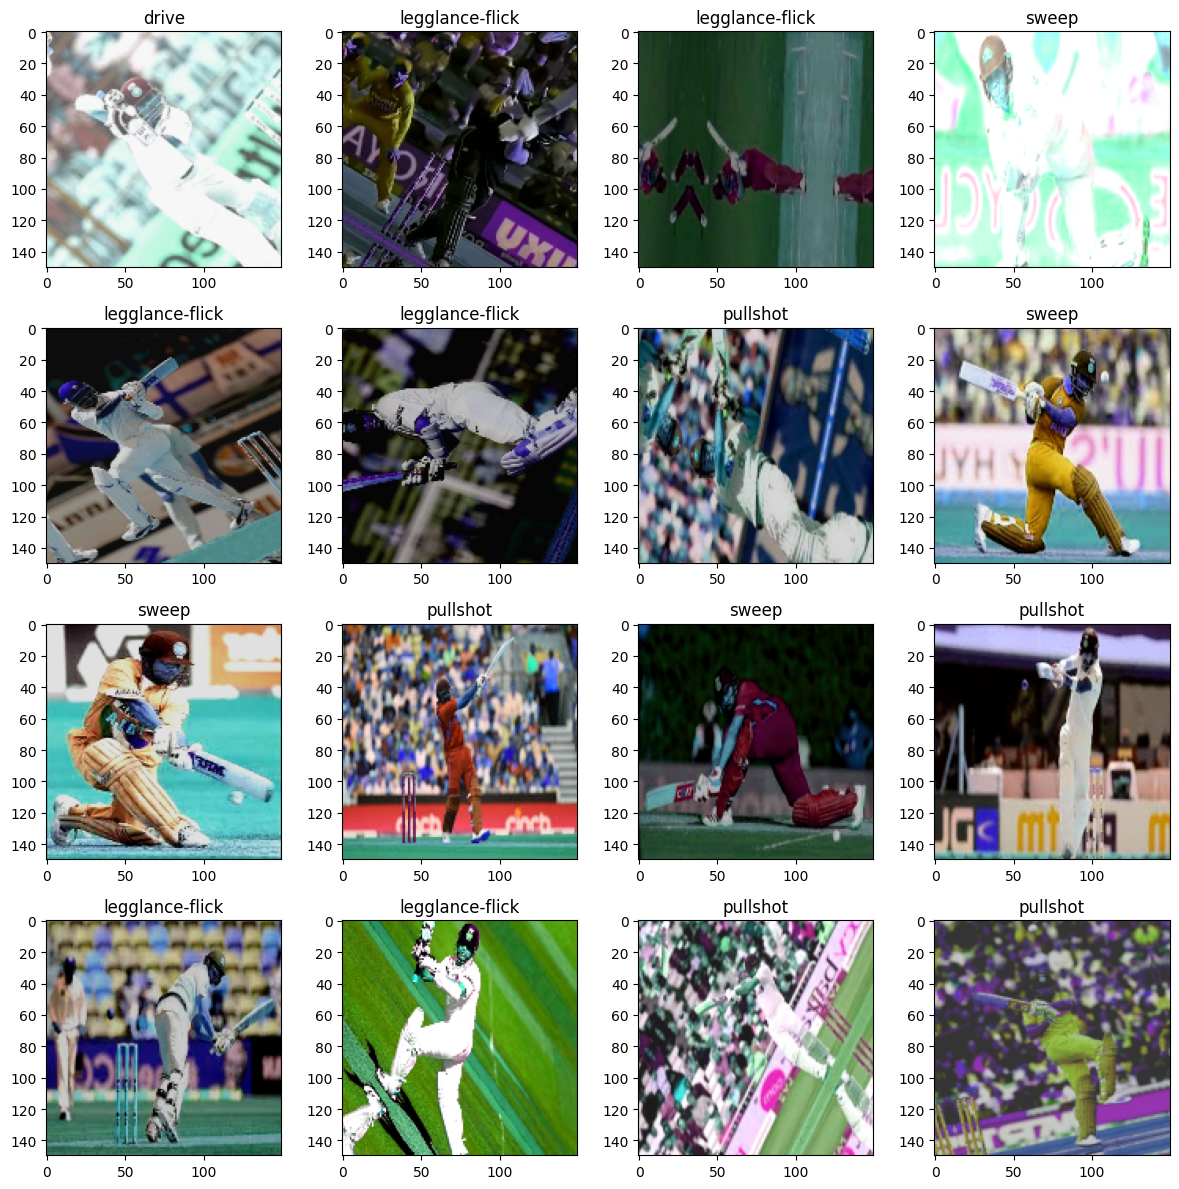

In [ ]:
f,ax = plt.subplots(4,4)
f.set_size_inches(12,12)
n=len(Z)

for i in range(4):
    for j in range(4):
        idx = rndm.randint(0,n)
        ax[i,j].imshow(X[idx])
        ax[i,j].set_title(Z[idx])

plt.tight_layout()

# Pre-Processing The Data

In [ ]:
# Label Encoding for the dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Z)

In [ ]:
 # Categorical Data
from keras.utils import to_categorical
Y=to_categorical(Y,4)

In [ ]:
X=np.array(X)

In [ ]:
Y.shape

(4724, 4)

# Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3779, 150, 150, 3), (945, 150, 150, 3), (3779, 4), (945, 4))

# Designing The Convolution Neural Network:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
 # Defining the parameters
num_classes = 4
batch_size = 32
epochs = 50

In [ ]:
# Building the CNN Model (Hidden Output)
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Visualizing The Convolution Neural Network:

In [ ]:
# Installing Visual Keras
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.9 MB/s eta 0:00:00


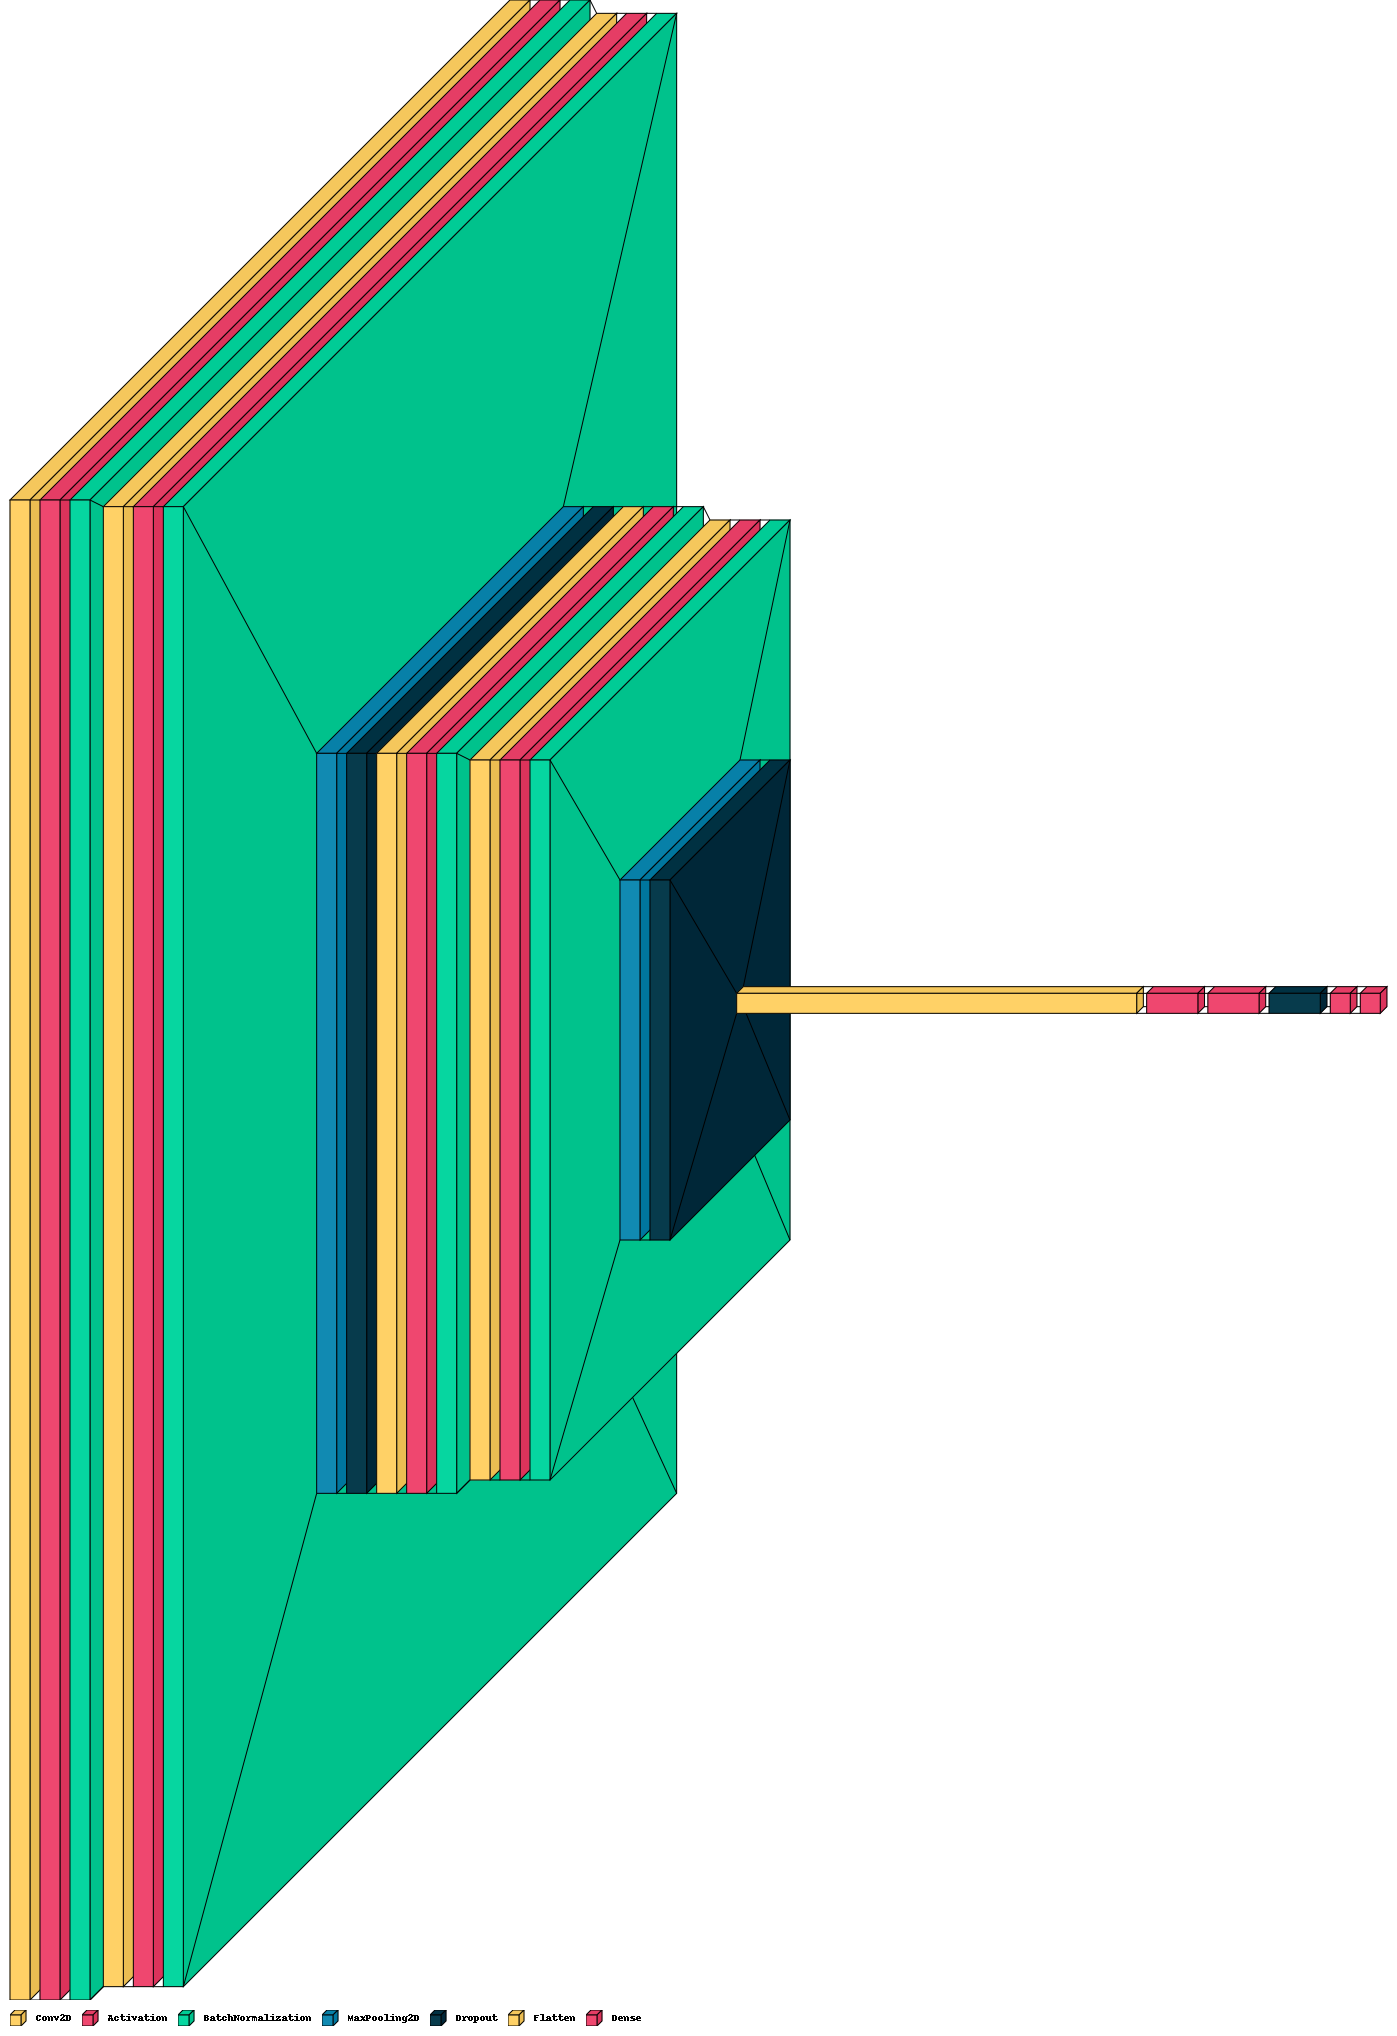

In [ ]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model,scale_xy=10,legend=True)

# Summary Of The Convolution Neural Network:

In [ ]:
# summary of the model (Hidden Input)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 activation (Activation)     (None, 150, 150, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 150, 150, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 148, 148, 64)      256       
 chNormalization)                                       

# Compiling & Training The Model:

In [ ]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255
epochs=2

# Training the model
history = model.fit(x_train, y_train,
            batch_size=batch_size,epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/2
119/119 [==============================] - 48s 245ms/step - loss: 20.5888 - accuracy: 0.4168 - val_loss: 12.2399 - val_accuracy: 0.3460
Epoch 2/2
119/119 [==============================] - 25s 211ms/step - loss: 10.9385 - accuracy: 0.6208 - val_loss: 14.6086 - val_accuracy: 0.2741


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

# Evaluating The Model:

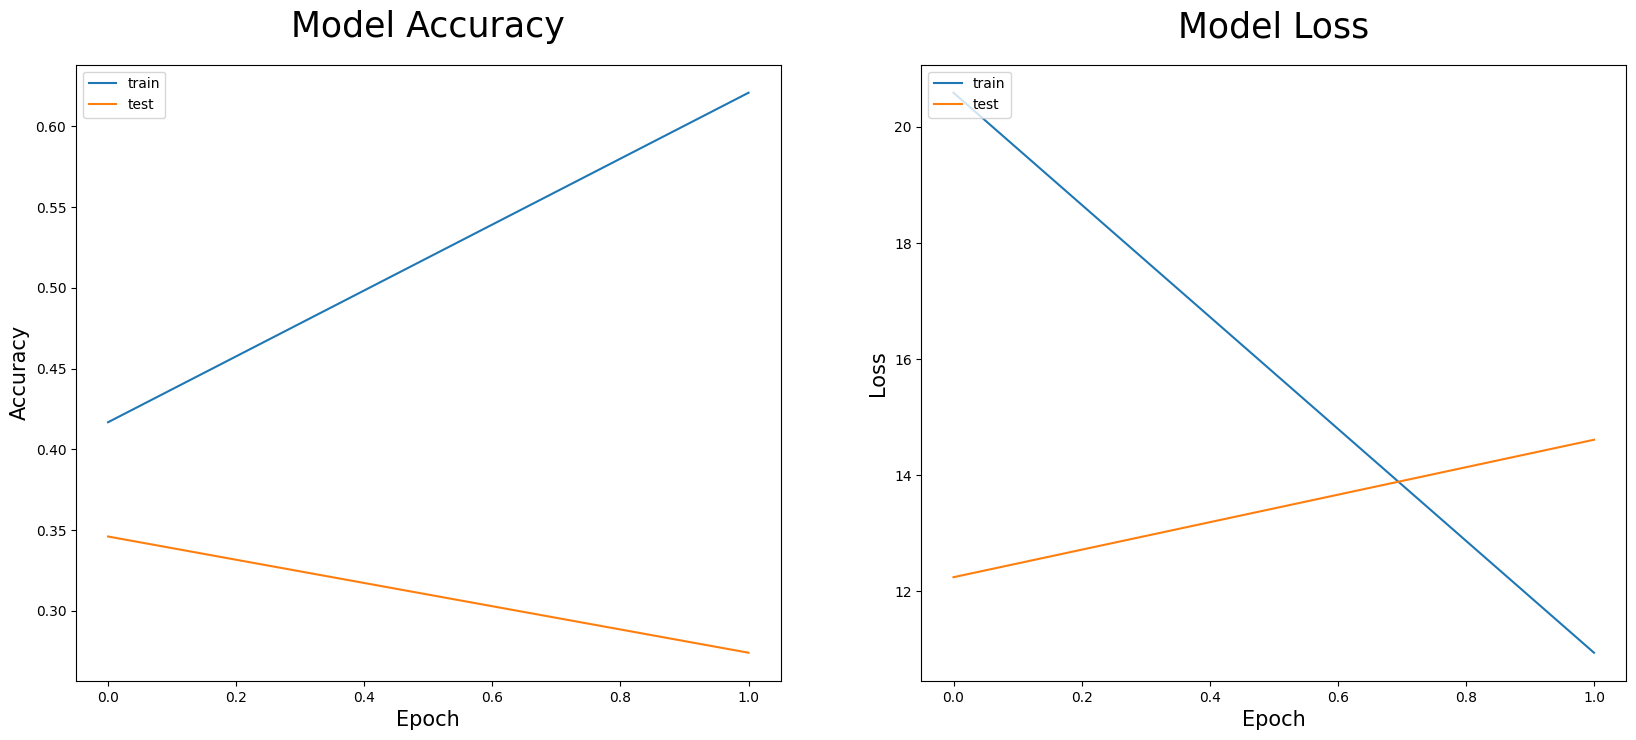

In [ ]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predictions Using The CNN Model:

30/30 [==============================] - 1s 35ms/step


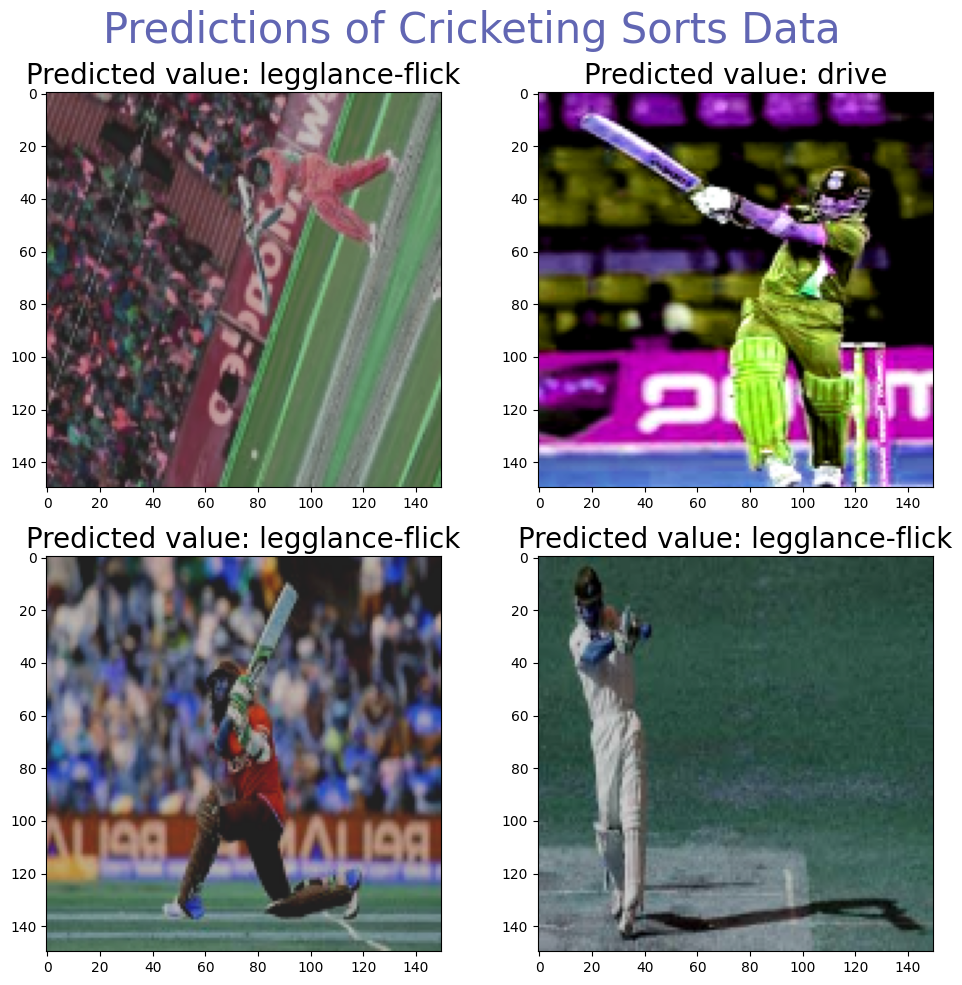

In [ ]:
predictions = model.predict(x_test)
class_names = ['pullshot', 'sweep', 'drive', 'legglance-flick']
plt.figure(figsize=[10, 10])
plt.subplot(2, 2, 1)
n = 3
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.subplot(2, 2, 2)
n = 4
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.subplot(2, 2, 3)
n = 8
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.subplot(2, 2, 4)
n = 6
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.suptitle("Predictions of Cricketing Sorts Data", size=30, color="#6166B3")
plt.tight_layout()
plt.show()

In [ ]:
import math
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [ ]:
def build_model(bottom_model, classes):
    model = bottom_model.layers[-2].output
    model = GlobalAveragePooling2D()(model)
    model = Dense(classes, activation = 'softmax', name = 'out_layer')(model)

    return model

In [ ]:
vgg = tf.keras.applications.VGG19(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))

head = build_model(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = head)
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)
lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = 2,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

# yhat_valid_vgg = np.argmax(model.predict(x=_test), axis=1)



80134624/80134624 [==============================] - 3s 0us/step
Epoch 1/2
118/118 [==============================] - 67s 414ms/step - loss: 1.3032 - accuracy: 0.3834 - val_loss: 1.1344 - val_accuracy: 0.5280 - lr: 1.0000e-04
Epoch 2/2
118/118 [==============================] - 51s 427ms/step - loss: 0.9938 - accuracy: 0.5930 - val_loss: 0.8496 - val_accuracy: 0.6296 - lr: 1.0000e-04


In [ ]:
yhat_valid_vgg = np.argmax(model.predict(x_test), axis=1)

30/30 [==============================] - 3s 81ms/step


In [ ]:
res = tf.keras.applications.ResNet50(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))

head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]
train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = epochs,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_res = np.argmax(model.predict(x_test), axis=1)


94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/2
118/118 [==============================] - 99s 545ms/step - loss: 0.5055 - accuracy: 0.8343 - val_loss: 5.2458 - val_accuracy: 0.2434 - lr: 1.0000e-04
Epoch 2/2
30/30 [==============================] - 2s 52ms/step


In [ ]:
"""# MobileNet"""

res = tf.keras.applications.MobileNet(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))

head = build_model(res, num_classes)
model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)
optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = 2,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_mob = np.argmax(model.predict(x_test), axis=1)

17225924/17225924 [==============================] - 1s 0us/step
Epoch 1/2
118/118 [==============================] - 71s 492ms/step - loss: 1.5948 - accuracy: 0.7957 - val_loss: 1.5280 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 2/2
30/30 [==============================] - 1s 20ms/step


In [ ]:
#Effiencientnet
res = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = 2,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_den = np.argmax(model.predict(x_test), axis=1)


In [ ]:
"""# DenseNet"""
import tensorflow as tf
res = tf.keras.applications.DenseNet121(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))
head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = 2,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_den = np.argmax(model.predict(x_test), axis=1)

29084464/29084464 [==============================] - 1s 0us/step
Epoch 1/2
119/118 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8378

ValueError: ignored

In [ ]:
df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
MobileNet,0.908995,0.923746,0.908995,0.909026
VGGNet,0.629630,0.638452,0.629630,0.627271
ResNet,0.241270,0.301149,0.241270,0.095238


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
res = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = 2,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_den = np.argmax(model.predict(x_test), axis=1)

In [ ]:
from tensorflow.keras.applications import NASNetLarge
res = NASNetLarge(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = 2,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_den = np.argmax(model.predict(x_test), axis=1)

In [ ]:
y_true = np.argmax(y_test, axis=1)
accuracy_vgg = accuracy_score(y_true, yhat_valid_vgg)
precision_vgg = precision_score(y_true, yhat_valid_vgg, average='weighted')
recall_vgg = recall_score(y_true, yhat_valid_vgg, average='weighted')
f1_vgg = f1_score(y_true, yhat_valid_vgg, average='weighted')

accuracy_res = accuracy_score(y_true, yhat_valid_res)
precision_res = precision_score(y_true, yhat_valid_res, average='weighted')
recall_res = recall_score(y_true, yhat_valid_res, average='weighted')
f1_res = f1_score(y_true, yhat_valid_res, average='weighted')

accuracy_mob = accuracy_score(y_true, yhat_valid_mob)
precision_mob = precision_score(y_true, yhat_valid_mob, average='weighted')
recall_mob = recall_score(y_true, yhat_valid_mob, average='weighted')
f1_mob = f1_score(y_true, yhat_valid_mob, average='weighted')

accuracy_eff = accuracy_score(y_true, yhat_valid_eff)
precision_eff = precision_score(y_true, yhat_valid_eff, average='weighted')
recall_eff = recall_score(y_true, yhat_valid_eff, average='weighted')
f1_eff = f1_score(y_true, yhat_valid_eff, average='weighted')

accuracy_den = accuracy_score(y_true, yhat_valid_den)
precision_den = precision_score(y_true, yhat_valid_den, average='weighted')
recall_den = recall_score(y_true, yhat_valid_den, average='weighted')
f1_den = f1_score(y_true, yhat_valid_den, average='weighted')




data = {
    'Model': ['VGGNet', 'ResNet', 'MobileNet', 'EfficientNet', 'DenseNet'],
    'Accuracy': [accuracy_vgg, accuracy_res, accuracy_mob, accuracy_eff, accuracy_den],
    'Precision': [precision_vgg, precision_res, precision_mob, precision_eff, precision_den],
    'Recall': [recall_vgg, recall_res, recall_mob, recall_eff, recall_den],
    'F1 Score': [f1_vgg, f1_res, f1_mob, f1_eff, f1_den]
    }

    # Create a DataFrame
df = pd.DataFrame(data)

    # Set 'Model' as the index
df.set_index('Model', inplace=True)

df = df.sort_values(by='Accuracy', ascending=False)